<a href="https://colab.research.google.com/github/virf96/Neural-Networks/blob/main/Redes_Ejercicio_1_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import h5py
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
train = h5py.File("/content/drive/MyDrive/datasets/train_catvnoncat.h5","r")
test= h5py.File("/content/drive/MyDrive/datasets/test_catvnoncat.h5","r")

In [23]:
train.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [24]:
xt = np.array(train['train_set_x'])
yt = np.array(train['train_set_y'])
xv = np.array(test['test_set_x'])
yv = np.array(test['test_set_y'])

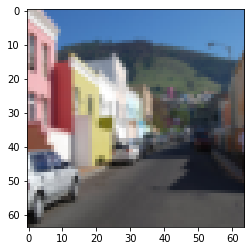

In [25]:
plt.imshow(xt[1])

### Pre-procesamiento

In [26]:
xt_es = xt/255
xv_es = xv/255

In [27]:
np.unique(yt)

array([0, 1])

### CNN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2

In [29]:
xt_es.shape

(209, 64, 64, 3)

In [30]:
model = Sequential()
model.add(InputLayer(input_shape=(64,64,3))) ## las dimensiones de la imagen, o las dimensiones de cada ejemplo
model.add(Conv2D(filters= 10 , kernel_size=(4,4), padding="same", activation = "relu" ))
model.add(MaxPool2D(pool_size=(2,2))) ## reducimos la imagen a la mitad de su tamaño 
model.add(Conv2D(filters= 30 , kernel_size=(3,3), padding="same", activation = "relu" ))
model.add(MaxPool2D(pool_size=(2,2))) ## reducimos la imagen a la mitad de su tamaño 
model.add(Flatten()) ## convetimos un tensor de cualesquiera dimensiones a un vector 
model.add(Dropout(.3))
model.add(Dense(units=128, activation ="relu", kernel_regularizer= l2(.0001)))
model.add(Dropout(.3))
model.add(Dense(1, activation="sigmoid")) ## capa de salida 

model.compile(loss=BinaryCrossentropy(), optimizer=Adam(.001,), metrics= ["accuracy"])

### Para ver la salida de la convolucion

In [170]:
model.layers

In [173]:
model.layers[0]

In [174]:
conv1 = model.layers[0](xt_es[2:3])

In [175]:
conv1[0].shape

TensorShape([64, 64, 10])

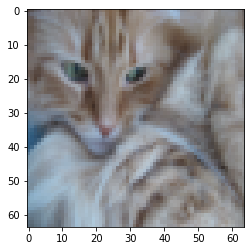

In [176]:
plt.imshow(xt[2])

In [177]:
conv1[0,:,:,8:10].shape

TensorShape([64, 64, 2])

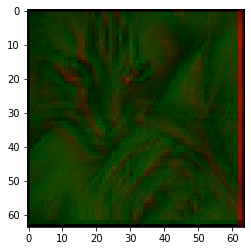

In [178]:
plt.imshow(conv1[0,:,:,7:10]) ## tomando el filtro 7

In [179]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 10)        490       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 30)        2730      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 30)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7680)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7680)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

#### Numero de parametros por capa

1.conv1(f=10, k=(4,4)) = 4x4x3x10 + 10 \
2. conv2(f=30, k=(3,3)) = 3x3x10x30 + 30 \
3. Dense(128) = 7680x128 + 128 = 983168 \ 
\
4. Dense(1) = 128x1+ 1 = 129 \
Tamaño del vector al aplicar flatten
Antes de aplicarlo tenemos un vector de dimensiones  (16, 16, 30)  \
Despues de aplicar el flatten tenemos un vector de tamaño 16x16x30 = 7680 \ 

In [180]:
history = model.fit(xt_es,yt, epochs= 300, batch_size =64, validation_data=(xv_es,yv))

Epoch 1/300
4/4 [==============================] - 2s 228ms/step - loss: 0.9201 - accuracy: 0.5598 - val_loss: 0.7196 - val_accuracy: 0.4000
Epoch 2/300
4/4 [==============================] - 1s 169ms/step - loss: 0.6721 - accuracy: 0.6220 - val_loss: 0.9843 - val_accuracy: 0.3400
Epoch 3/300
4/4 [==============================] - 1s 179ms/step - loss: 0.6291 - accuracy: 0.6555 - val_loss: 0.7784 - val_accuracy: 0.3400
Epoch 4/300
4/4 [==============================] - 1s 172ms/step - loss: 0.5731 - accuracy: 0.6890 - val_loss: 0.9941 - val_accuracy: 0.3400
Epoch 5/300
4/4 [==============================] - 1s 169ms/step - loss: 0.5480 - accuracy: 0.6938 - val_loss: 0.7985 - val_accuracy: 0.6600
Epoch 6/300
4/4 [==============================] - 1s 171ms/step - loss: 0.5305 - accuracy: 0.7368 - val_loss: 0.8499 - val_accuracy: 0.6600
Epoch 7/300
4/4 [==============================] - 1s 175ms/step - loss: 0.5282 - accuracy: 0.7129 - val_loss: 0.8386 - val_accuracy: 0.6400
Epoch 8/300
4

### Funcion de perdida

In [181]:
fig = go.Figure()
fig.add_trace( go.Scatter(x= np.arange(len(history.history["loss"])), y=history.history["loss"], mode="lines"))
fig.add_trace(go.Scatter(x= np.arange(len(history.history["val_loss"])), y=history.history["val_loss"], mode="lines"))
fig.show()

In [182]:
fig = go.Figure()
fig.add_trace( go.Scatter(x= np.arange(len(history.history["accuracy"])), y=history.history["accuracy"], mode="lines"))
fig.add_trace(go.Scatter(x= np.arange(len(history.history["val_accuracy"])), y=history.history["val_accuracy"], mode="lines"))
fig.update_layout(dict(title="Accuracy"))
fig.show()

In [183]:
xv.shape

(50, 64, 64, 3)

No es un gato


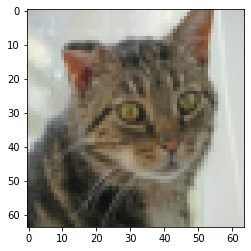

In [184]:
index = 33
print("el modelo dice que es un gato") if np.where(model.predict(xv_es[index:index+1]>=.5,1,0))==1 else print("No es un gato")
plt.imshow(xv[index])

In [ ]:
64*64*3

12288